In [10]:
import pandas as pd
import numpy as np

In [26]:
data = pd.read_csv('/Users/ashuthoshdasari/Documents/datasets/MNIST_Digit_Recog/train.csv')
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from keras.layers import Dense 
%matplotlib inline

In [49]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Understanding image dataset

In [50]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


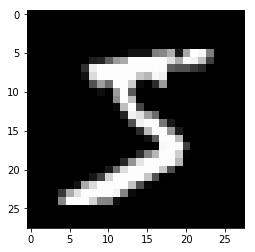

In [51]:
plt.imshow(X_train[0], cmap='gray')

### Preprocessing the data

In [52]:
image_height, image_width = 28,28

In [53]:
X_train = X_train.reshape(60000,image_height*image_width)
X_test = X_test.reshape(10000,image_height*image_width)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [54]:
print(X_train[0])
x_train = X_train.astype('float32')
x_test = X_test.astype('float32')

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [55]:
x_train /= 255.0
x_test /= 255.0
#print(x_train[0])

In [56]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [57]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


### Build the keras model

In [61]:
model = Sequential()

In [62]:
model.add(Dense(512, activation='relu', input_shape = (784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

### compile the model

In [63]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### Train model

In [92]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 187us/step - loss: 0.1742 - acc: 0.9466 - val_loss: 0.0985 - val_acc: 0.9691
Epoch 2/5
60000/60000 [==============================] - 11s 183us/step - loss: 0.0736 - acc: 0.9768 - val_loss: 0.0785 - val_acc: 0.9759
Epoch 3/5
60000/60000 [==============================] - 12s 196us/step - loss: 0.0502 - acc: 0.9842 - val_loss: 0.0755 - val_acc: 0.9772
Epoch 4/5
60000/60000 [==============================] - 12s 196us/step - loss: 0.0371 - acc: 0.9881 - val_loss: 0.0821 - val_acc: 0.9770
Epoch 5/5
60000/60000 [==============================] - 11s 182us/step - loss: 0.0313 - acc: 0.9902 - val_loss: 0.0885 - val_acc: 0.9764


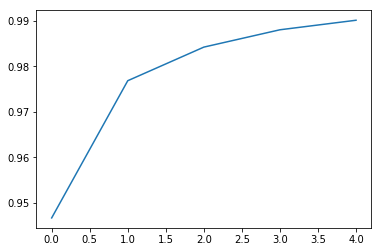

In [93]:
plt.plot(history.history['acc'])      #training Acc 

### Evaluating the model

In [94]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 45us/step


In [95]:
score

[0.08849949264694479, 0.9764]

### Convolution Neural Networks

In [96]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [108]:
cnn = Sequential()

In [109]:
cnn.add(Conv2D(32, kernel_size=(5,5), input_shape=(28,28,1), padding='Same', activation='relu'))

In [110]:
cnn.add(MaxPooling2D())

In [111]:
cnn.add(Conv2D(64, kernel_size=(5,5), padding='Same', activation='relu'))

In [112]:
cnn.add(MaxPooling2D())

In [113]:
cnn.add(Flatten())

In [114]:
cnn.add(Dense(1024, activation='relu'))

In [115]:
cnn.add(Dense(10, activation='softmax'))

In [116]:
cnn.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [117]:
print(cnn.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              3212288   
_________________________________________________________________
dense_10 (Dense)             (None, 10)                10250     
Total para

In [120]:
x_train = x_train.reshape(-1,28, 28, 1)         #Reshape for CNN
x_test = x_test.reshape(-1,28, 28, 1)

In [121]:
history_cnn = cnn.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 157s 3ms/step - loss: 0.0981 - acc: 0.9692 - val_loss: 0.0468 - val_acc: 0.9861
Epoch 2/5
60000/60000 [==============================] - 157s 3ms/step - loss: 0.0352 - acc: 0.9892 - val_loss: 0.0408 - val_acc: 0.9879
Epoch 3/5
60000/60000 [==============================] - 159s 3ms/step - loss: 0.0242 - acc: 0.9924 - val_loss: 0.0291 - val_acc: 0.9913
Epoch 4/5
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0181 - acc: 0.9945 - val_loss: 0.0361 - val_acc: 0.9888
Epoch 5/5
60000/60000 [==============================] - 168s 3ms/step - loss: 0.0142 - acc: 0.9958 - val_loss: 0.0354 - val_acc: 0.9906


In [123]:
score = cnn.evaluate(x_test, y_test)

10000/10000 [==============================] - 6s 574us/step


In [124]:
score

[0.03544179155457641, 0.9906]